### Teste para avaliação de Funcionamentop de uma  versão 2.3 do Tensorflow compilada  manualmente para funcionar com placas de videos com suporte a compute capability de apenas  3.0.
no caso em específico uma gtx870m, 6gb ram, Nvidia Driver 418.113 | Cuda Version 10.1 | Cudnn 7.6.2

Fontes: https://www.tensorflow.org/tutorials/keras/classification?hl=pt-br

In [ ]:
# !pip install torch

In [56]:
#import torch
#torch.__version__

In [1]:
import tensorflow as tf

2024-07-07 19:50:20.642526: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1


In [2]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

2024-07-07 19:50:32.344406: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2024-07-07 19:50:32.360242: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-07 19:50:32.361009: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 870M computeCapability: 3.0
coreClock: 0.967GHz coreCount: 7 deviceMemorySize: 5.93GiB deviceMemoryBandwidth: 111.76GiB/s
2024-07-07 19:50:32.361025: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2024-07-07 19:50:32.366556: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2024-07-07 19:50:32.368846: I tensorflow/stream_executor/platform/de

In [1]:
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 3.6 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 13.7 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 14.4 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.9 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [2]:
pip show matplotlib

Name: matplotlib
Version: 3.5.3
Summary: Python plotting package
Home-page: https://matplotlib.org
Author: John D. Hunter, Michael Droettboom
Author-email: matplotlib-users@python.org
License: PSF
Location: /home/sandman/dev/.env37/lib/python3.7/site-packages
Requires: cycler, fonttools, kiwisolver, numpy, packaging, pillow, pyparsing, python-dateutil
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


2.3.4


In [4]:
tf.test.gpu_device_name()

2024-07-07 19:51:22.882884: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-07 19:51:22.883740: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 870M computeCapability: 3.0
coreClock: 0.967GHz coreCount: 7 deviceMemorySize: 5.93GiB deviceMemoryBandwidth: 111.76GiB/s
2024-07-07 19:51:22.883772: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2024-07-07 19:51:22.883793: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2024-07-07 19:51:22.883803: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.so.10
2024-07-07 19:51:22.883813: I tensorflow/stream_executor/platform/

'/device:GPU:0'

### Importe a base de dados Fashion MNIST

Esse tutorial usa a base de dados Fashion MNIST que contém 70,000 imagens em tons de cinza em 10 categorias. As imagens mostram artigos individuais de roupas com baixa resolução (28 por 28 pixels), como vemos aqui:
Fashion MNIST sprite
Figure 1. Amostras de Fashion-MNIST (por Zalando, MIT License).
 

Fashion MNIST tem como intenção substituir a clássica base de dados MNIST— frequentemente usada como "Hello, World" de programas de aprendizado de máquina (machine learning) para visão computacional. A base de dados MNIST contém imagens de dígitos escritos à mão (0, 1, 2, etc.) em um formato idêntico ao dos artigos de roupas que usaremos aqui.

Esse tutorial usa a Fashion MNIST para variar, e porque é um problema um pouco mais desafiador que o regular MNIST. Ambas bases são relativamente pequenas e são usadas para verificar se um algoritmo funciona como esperado. Elas são bons pontos de partida para testar e debugar código.

Usaremos 60,000 imagens para treinar nossa rede e 10,000 imagens para avaliar quão precisamente nossa rede aprendeu a classificar as imagens. Você pode acessar a Fashion MNIST diretamente do TensorFlow. Importe e carregue a base Fashion MNIST diretamente do TensorFlow:

(dowloaded in ~/.keras folder)



In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### Carregando a base de dados que retorna quatro NumPy arrays:

    Os arrays train_images e train_labels são o conjunto de treinamento— os dados do modelo usados para aprender.
    O modelo é testado com o conjunto de teste, os arrays test_images e test_labels.

As imagens são arrays NumPy de 28x28, com os valores de pixels entre 0 to 255. As labels (alvo da classificação) são um array de inteiros, no intervalo de 0 a 9. Esse corresponde com a classe de roupa que cada imagem representa:
Label 	Classe
0 	Camisetas/Top (T-shirt/top)
1 	Calça (Trouser)
2 	Suéter (Pullover)
3 	Vestidos (Dress)
4 	Casaco (Coat)
5 	Sandálias (Sandal)
6 	Camisas (Shirt)
7 	Tênis (Sneaker)
8 	Bolsa (Bag)
9 	Botas (Ankle boot)

Cada imagem é mapeada com um só label. Já que o nome das classes não são incluídas na base de dados, armazene os dados aqui para usá-los mais tarde quando plotarmos as imagens:

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Explore os dados
Vamos explorar o formato da base de dados antes de treinar o modelo. O próximo comando mostra que existem 60000 imagens no conjunto de treinamento, e cada imagem é representada em 28 x 28 pixels:

In [7]:
train_images.shape

(60000, 28, 28)

Do mesmo modo, existem 60000 labels no conjunto de treinamento:

In [8]:
len(train_labels)

60000

Cada label é um inteiro entre 0 e 9:

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Existem 10000 imagens no conjunto de teste. Novamente, cada imagem é representada por 28 x 28 pixels:

In [10]:
test_images.shape

(10000, 28, 28)

E um conjunto de teste contendo 10000 labels das imagens :

In [11]:
len(test_labels)

10000

### Pré-processe os dados
Os dados precisam ser pré-processados antes de treinar a rede. Se você inspecionar a primeira imagem do conjunto de treinamento, você verá que os valores dos pixels estão entre 0 e 255:

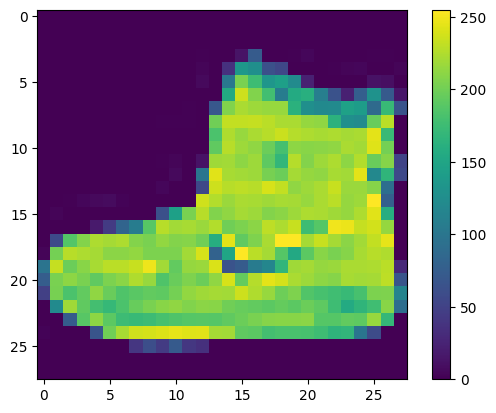

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escalaremos esses valores no intervalo de 0 e 1 antes de alimentar o modelo da rede neural. Para fazer isso, dividimos os valores por 255. É importante que o conjunto de treinamento e o conjunto de teste podem ser pré-processados do mesmo modo:

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Para verificar que os dados estão no formato correto e que estamos prontos para construir e treinar a rede, vamos mostrar as primeiras 25 imagens do conjunto de treinamento e mostrar o nome das classes de cada imagem abaixo.

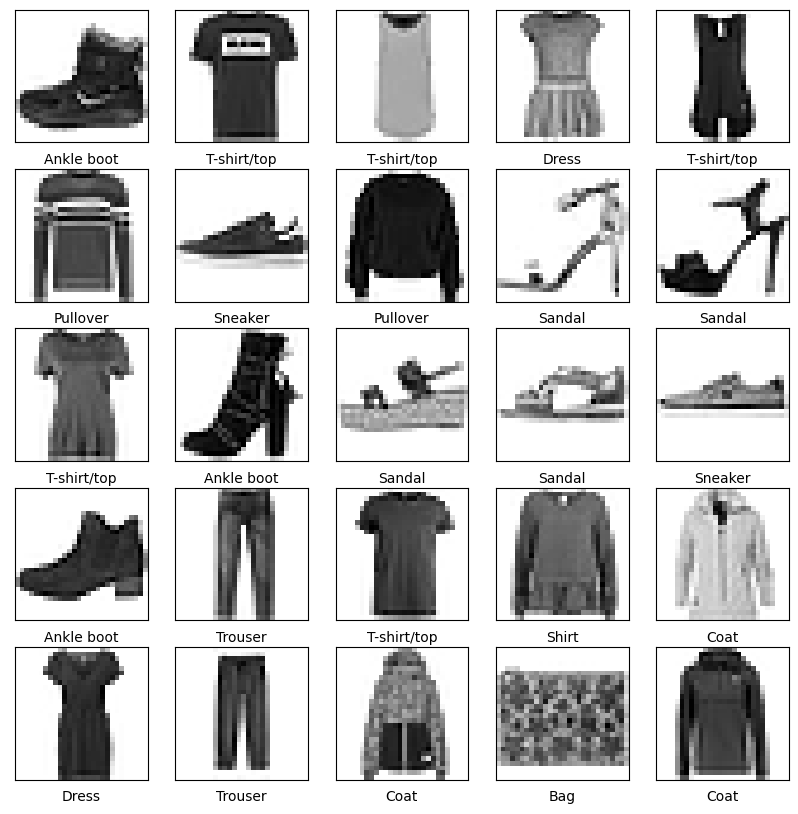

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Construindo o modelo

Construir a rede neural requer configurar as camadas do modelo, e depois, compilar o modelo.
Montar as camadas

O principal bloco de construção da rede neural é a camada (layer). As camadas (layers) extraem representações dos dados inseridos na rede. Com sorte, essas representações são significativas para o problema à mão.

Muito do deep learning consiste em encadear simples camadas. Muitas camadas, como tf.keras.layers.Dense, tem parâmetros que são aprendidos durante o treinamento.

In [15]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

2024-07-07 19:52:27.306918: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-07 19:52:27.307760: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: GeForce GTX 870M computeCapability: 3.0
coreClock: 0.967GHz coreCount: 7 deviceMemorySize: 5.93GiB deviceMemoryBandwidth: 111.76GiB/s
2024-07-07 19:52:27.307786: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2024-07-07 19:52:27.307804: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2024-07-07 19:52:27.307813: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.so.10
2024-07-07 19:52:27.307821: I tensorflow/stream_executor/platform/

A primeira camada da rede, tf.keras.layers.Flatten, transforma o formato da imagem de um array de imagens de duas dimensões (of 28 by 28 pixels) para um array de uma dimensão (de 28 * 28 = 784 pixels). Pense nessa camada como camadas não empilhadas de pixels de uma imagem e os enfilere. Essa camada não tem parâmetros para aprender; ela só reformata os dados.

Depois dos pixels serem achatados, a rede consiste de uma sequência de duas camadas tf.keras.layers.Dense. Essas são camadas neurais densely connected, ou fully connected. A primeira camada Dense tem 128 nós (ou neurônios). A segunda (e última) camada é uma softmax de 10 nós que retorna um array de 10 probabilidades, cuja soma resulta em 1. Cada nó contém um valor que indica a probabilidade de que aquela imagem pertence a uma das 10 classes.

### Compile o modelo

Antes do modelo estar pronto para o treinamento, é necessário algumas configurações a mais. Essas serão adicionadas no passo de compilação:

    Função Loss —Essa mede quão precisa o modelo é durante o treinamento. Queremos minimizar a função para guiar o modelo para a direção certa.
    Optimizer —Isso é como o modelo se atualiza com base no dado que ele vê e sua função loss.
    Métricas —usadas para monitorar os passos de treinamento e teste. O exemplo abaixo usa a acurácia, a fração das imagens que foram classificadas corretamente.


In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Treine o modelo

Treinar a rede neural requer os seguintes passos:

    1. Alimente com os dados de treinamento, o modelo. Neste exemplo, os dados de treinamento são os arrays train_images e train_labels.
    2. O modelo aprende como associar as imagens as labels.
    3. Perguntamos ao modelo para fazer previsões sobre o conjunto de teste — nesse exemplo, o array test_images. Verificamos se as previsões combinaram com as labels do array test_labels.

Para começar a treinar, chame o método model.fit— assim chamado, porque ele "encaixa" o modelo no conjunto de treinamento:

In [17]:
model.fit(train_images, train_labels, epochs=20)

Epoch 1/20
  33/1875 [..............................] - ETA: 2s - loss: 1.4198 - accuracy: 0.5379

2024-07-07 19:52:43.714243: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10


1875/1875 [==============================] - 3s 1ms/step - loss: 0.5067 - accuracy: 0.8222
Epoch 2/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3799 - accuracy: 0.8648
Epoch 3/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3415 - accuracy: 0.8766
Epoch 4/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3175 - accuracy: 0.8844
Epoch 5/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2982 - accuracy: 0.8905
Epoch 6/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2827 - accuracy: 0.8952
Epoch 7/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2699 - accuracy: 0.8991
Epoch 8/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2583 - accuracy: 0.9038
Epoch 9/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2494 - accuracy: 0.9075
Epoch 10/20
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2407 - accurac

À medida que o modelo treina, as métricas loss e acurácia são mostradas. O modelo atinge uma acurácia de 0.88 (ou 88%) com o conjunto de treinamento.
### Avalie a acurácia
Depois, compare como o modelo performou com o conjunto de teste:

In [18]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3467 - accuracy: 0.8949

Test accuracy: 0.8949000239372253


Acabou que o a acurácia com o conjunto de teste é um pouco menor do que a acurácia de treinamento. Essa diferença entre as duas acurácias representa um overfitting. Overfitting é modelo de aprendizado de máquina performou de maneira pior em um conjunto de entradas novas, e não usadas anteriormente, que usando o conjunto de treinamento.
### Faça predições
Com o modelo treinado, o usaremos para predições de algumas imagens.

In [19]:
predictions = model.predict(test_images)

Aqui, o modelo previu que a label de cada imagem no conjunto de treinamento. Vamos olhar na primeira predição:

In [20]:
predictions[0]

array([1.2806309e-10, 3.7738465e-10, 3.4184763e-10, 1.5779687e-11,
       9.3055511e-12, 3.9924766e-05, 3.7055738e-09, 1.0794086e-03,
       1.2988338e-11, 9.9888068e-01], dtype=float32)

A predição é um array de 10 números. Eles representam um a confiança do modelo que a imagem corresponde a cada um dos diferentes artigos de roupa. Podemos ver cada label tem um maior valor de confiança:

In [21]:
np.argmax(predictions[0])

9

Então, o modelo é confiante de que esse imagem é uma bota (ankle boot) ou class_names[9]. Examinando a label do teste, vemos que essa classificação é correta:

In [22]:
test_labels[0]

9

Podemos mostrar graficamente como se parece em um conjunto total de previsão de 10 classes.

In [23]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Vamos olhar a previsão imagem na posição 0, do array de predição.

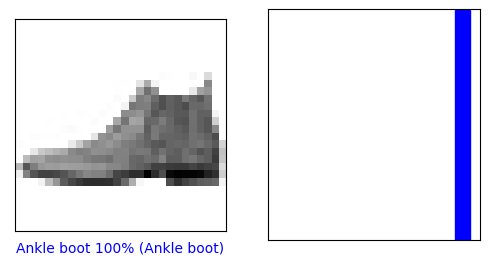

In [24]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

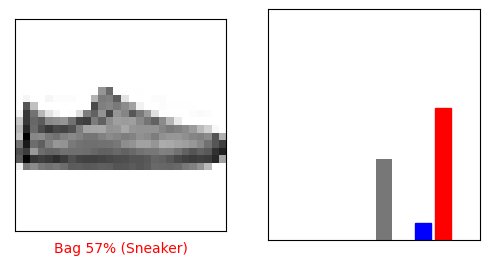

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()


Vamos plotar algumas da previsão do modelo. Labels preditas corretamente são azuis e as predições erradas são vermelhas. O número dá a porcentagem (de 100) das labels preditas. Note que o modelo pode errar mesmo estando confiante.

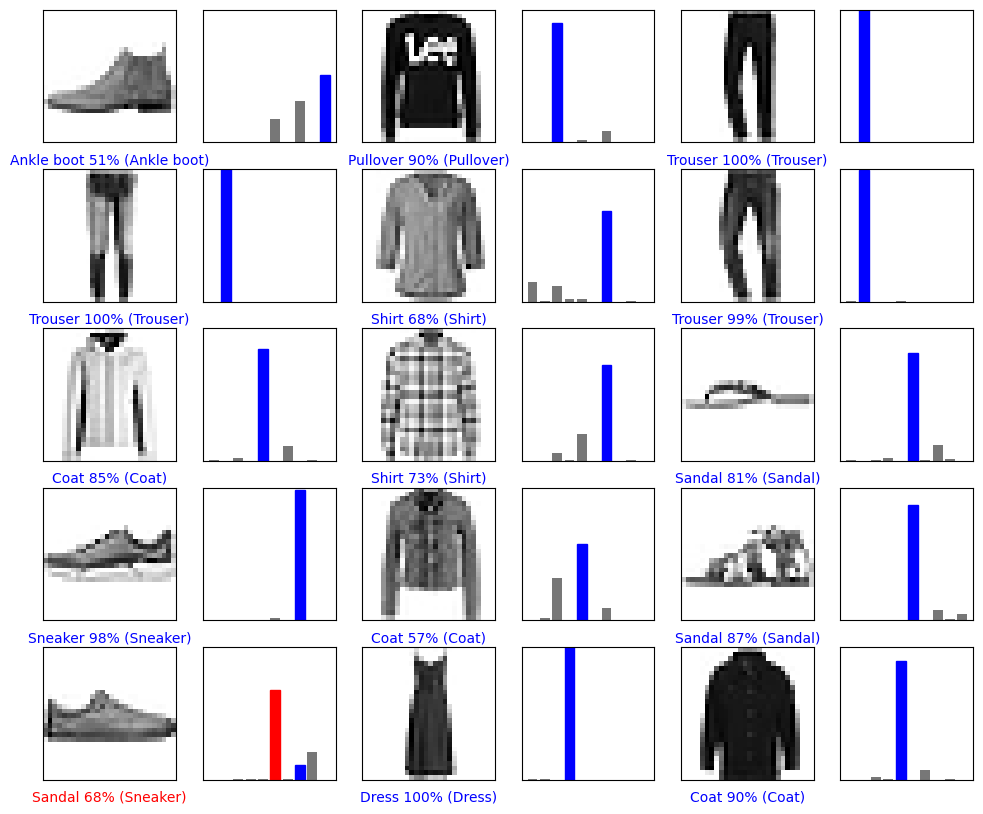

In [49]:
# Plota o primeiro X test images, e as labels preditas, e as labels verdadeiras.
# Colore as predições corretas de azul e as incorretas de vermelho.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

Finamente, use o modelo treinado para fazer a predição de uma única imagem.

In [50]:
# Grab an image from the test dataset.
img = test_images[0]
print(img.shape)

(28, 28)


Modelos tf.keras são otimizados para fazer predições em um batch, ou coleções, de exemplos de uma vez. De acordo, mesmo que usemos uma única imagem, precisamos adicionar em uma lista:

In [51]:
# Adiciona a imagem em um batch que possui um só membro.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Agora prediremos a label correta para essa imagem:

In [52]:
predictions_single = model.predict(img)

print(predictions_single)

[[7.3000501e-07 2.2771792e-07 7.9295314e-06 9.0650201e-06 1.3740138e-05
  1.7542049e-01 1.2324957e-05 3.0970985e-01 4.5920126e-03 5.1023364e-01]]


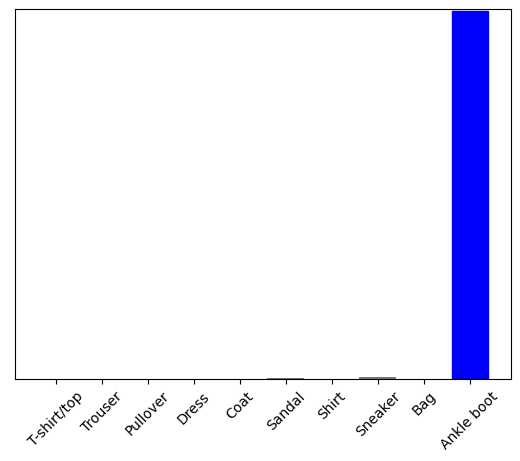

In [33]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)


model.predict retorna a lista de listas — uma lista para cada imagem em um batch de dados. Pegue a predição de nossa (única) imagem no batch:

In [53]:
np.argmax(predictions_single[0])

9